### Neural network Implementation

In [4]:
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [77]:
NB_EPOCH = 30
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10

OPTIMIZER = Adam() 
N_HIDDEN = 128
VALIDATION_SPLIT=0.1

DROPOUT = 0.2
RESHAPED = 784

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_test.shape,y_train.shape)

(10000, 28, 28) (60000,)


In [27]:
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


In [28]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)


#### Simple architecture

In [34]:
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('sigmoid'))


model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 1s - loss: 0.7236 - acc: 0.8344 - val_loss: 0.3250 - val_acc: 0.9177
Epoch 2/30
54000/54000 [==============================] - 1s - loss: 0.3543 - acc: 0.9036 - val_loss: 0.2690 - val_acc: 0.9282
Epoch 3/30
54000/54000 [==============================] - 0s - loss: 0.3162 - acc: 0.9126 - val_loss: 0.2508 - val_acc: 0.9323
Epoch 4/30
54000/54000 [==============================] - 0s - loss: 0.2997 - acc: 0.9168 - val_loss: 0.2419 - val_acc: 0.9353
Epoch 5/30
54000/54000 [==============================] - 0s - loss: 0.2900 - acc: 0.9197 - val_loss: 0.2356 - val_acc: 0.9355
Epoch 6/30
54000/54000 [==============================] - 0s - loss: 0.2831 - acc: 0.9214 - val_loss: 0.2327 - val_acc: 0.9363
Epoch 7/30
54000/54000 [==============================] - 0s - loss: 0.2782 - acc: 0.9226 - val_loss: 0.2292 - val_acc: 0.9367
Epoch 8/30
54000/54000 [==============================] - 0s -

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [36]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test accuracy:', score[1])

 7808/10000 [======================>.......] - ETA: 0sTest accuracy: 0.9276


#### hidden layer added

In [61]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 1s - loss: 0.3441 - acc: 0.9020 - val_loss: 0.1421 - val_acc: 0.9555
Epoch 2/30
54000/54000 [==============================] - 1s - loss: 0.1395 - acc: 0.9579 - val_loss: 0.1112 - val_acc: 0.9678
Epoch 3/30
54000/54000 [==============================] - 1s - loss: 0.0931 - acc: 0.9715 - val_loss: 0.0946 - val_acc: 0.9697
Epoch 4/30
54000/54000 [==============================] - 1s - loss: 0.0707 - acc: 0.9786 - val_loss: 0.0869 - val_acc: 0.9745
Epoch 5/30
54000/54000 [==============================] - 1s - loss: 0.0554 - acc: 0.9828 - val_loss: 0.0813 - val_acc: 0.9748
Epoch 6/30
54000/54000 [==============================] - 1s - loss: 0.0441 - acc: 0.9861 - val_loss: 0.0787 - val_acc: 0.9778
Epoch 7/30
54000/54000 [==============================] - 1s - loss: 0.0352 - acc: 0.9892 - val_loss: 0.0847 - val_acc: 0.9775
Epoch 8/30
54000/54000 [==============================] - 1s -

In [62]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_23 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_24 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_25 (Activation)   (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [63]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test accuracy:', score[1])

 9504/10000 [===========================>..] - ETA: 0sTest accuracy: 0.9766


#### Dropouts added

In [78]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history=model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 2s - loss: 0.4900 - acc: 0.8453 - val_loss: 0.1329 - val_acc: 0.9613
Epoch 2/30
54000/54000 [==============================] - 2s - loss: 0.2021 - acc: 0.9409 - val_loss: 0.0996 - val_acc: 0.9717
Epoch 3/30
54000/54000 [==============================] - 2s - loss: 0.1558 - acc: 0.9541 - val_loss: 0.0898 - val_acc: 0.9733
Epoch 4/30
54000/54000 [==============================] - 2s - loss: 0.1302 - acc: 0.9611 - val_loss: 0.0814 - val_acc: 0.9748
Epoch 5/30
54000/54000 [==============================] - 2s - loss: 0.1101 - acc: 0.9679 - val_loss: 0.0799 - val_acc: 0.9778
Epoch 6/30
54000/54000 [==============================] - 2s - loss: 0.1007 - acc: 0.9703 - val_loss: 0.0744 - val_acc: 0.9762
Epoch 7/30
54000/54000 [==============================] - 2s - loss: 0.0908 - acc: 0.9731 - val_loss: 0.0710 - val_acc: 0.9792
Epoch 8/30
54000/54000 [==============================] - 2s -

In [79]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_37 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_38 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               16512     
__________

In [80]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)

print('Test accuracy:', score[1])

 9696/10000 [============================>.] - ETA: 0sTest accuracy: 0.9813


#### Loss and accuracy graph

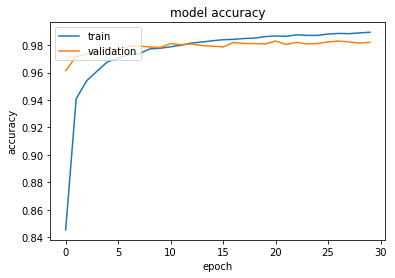

In [81]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


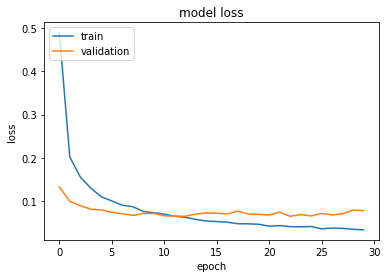

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [83]:
import cv2

In [88]:
image = cv2.imread("/home/sharma/git-hub/image-classification-keras/examples/santa_01.png",1)

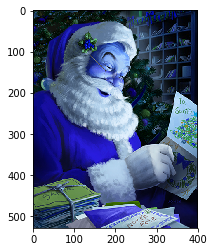

In [97]:
plt.imshow(image)
plt.show()

In [93]:
cvtImage  = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

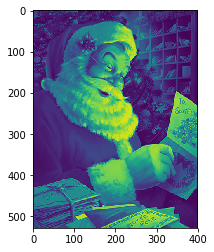

In [94]:
plt.imshow(cvtImage)

In [99]:
cv2.imshow("Santa",image)
cv2.waitKey()
cv2.destroyAllWindows()


error: /io/opencv/modules/highgui/src/window.cpp:583: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function cvShowImage


In [104]:
resized = cv2.resize(image,(120,120))

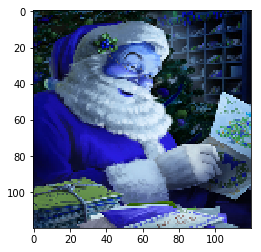

In [105]:
plt.imshow(resized)

### RNN - Text generation

In [1]:
import numpy as np
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential


Using TensorFlow backend.
/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
fin = open("./Deep_Learning/11.txt", 'rb')
lines = []
for line in fin:
    line = line.strip().lower()
    line = line.decode("ascii", "ignore")
    if len(line) == 0:
        continue
    lines.append(line)
fin.close()



In [3]:
lines

['project gutenbergs alices adventures in wonderland, by lewis carroll',
 'this ebook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  you may copy it, give it away or',
 're-use it under the terms of the project gutenberg license included',
 'with this ebook or online at www.gutenberg.org',
 'title: alices adventures in wonderland',
 'author: lewis carroll',
 'posting date: june 25, 2008 [ebook #11]',
 'release date: march, 1994',
 'last updated: october 6, 2016',
 'language: english',
 'character set encoding: utf-8',
 '*** start of this project gutenberg ebook alices adventures in wonderland ***',
 'alices adventures in wonderland',
 'lewis carroll',
 'the millennium fulcrum edition 3.0',
 'chapter i. down the rabbit-hole',
 'alice was beginning to get very tired of sitting by her sister on the',
 'bank, and of having nothing to do: once or twice she had peeped into the',
 'book her sister was reading, but it had no pictures or conversati

In [4]:
text = " ".join(lines)

In [5]:
text

'project gutenbergs alices adventures in wonderland, by lewis carroll this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  you may copy it, give it away or re-use it under the terms of the project gutenberg license included with this ebook or online at www.gutenberg.org title: alices adventures in wonderland author: lewis carroll posting date: june 25, 2008 [ebook #11] release date: march, 1994 last updated: october 6, 2016 language: english character set encoding: utf-8 *** start of this project gutenberg ebook alices adventures in wonderland *** alices adventures in wonderland lewis carroll the millennium fulcrum edition 3.0 chapter i. down the rabbit-hole alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, and what is the use of a book, thought alice without pictures or c

In [6]:
chars = list(set(text))
nb_chars = len(chars)

In [7]:
print(chars)

['/', '@', 'z', 'r', '(', ':', '?', '$', 'u', 'w', 'b', 'o', '*', '2', '4', '%', '8', 'g', 'q', 'c', '1', '#', '6', 'a', 't', 'n', '0', ')', 'k', 'x', 's', 'p', ' ', '7', 'l', '[', 'v', 'j', 'm', '5', '!', 'h', '-', 'i', '9', 'y', 'f', '3', '_', ',', '.', ';', 'e', ']', 'd']


In [8]:
nb_chars

55

In [9]:
char2index = dict((c, i) for i, c in enumerate(chars))
index2char = dict((i, c) for i, c in enumerate(chars))

In [10]:
print(char2index)

{'/': 0, '@': 1, 'z': 2, 'r': 3, '(': 4, ':': 5, '?': 6, '$': 7, 'u': 8, 'w': 9, 'b': 10, 'o': 11, '*': 12, '2': 13, '4': 14, '%': 15, '8': 16, 'g': 17, 'q': 18, 'c': 19, '1': 20, '#': 21, '6': 22, 'a': 23, 't': 24, 'n': 25, '0': 26, ')': 27, 'k': 28, 'x': 29, 's': 30, 'p': 31, ' ': 32, '7': 33, 'l': 34, '[': 35, 'v': 36, 'j': 37, 'm': 38, '5': 39, '!': 40, 'h': 41, '-': 42, 'i': 43, '9': 44, 'y': 45, 'f': 46, '3': 47, '_': 48, ',': 49, '.': 50, ';': 51, 'e': 52, ']': 53, 'd': 54}


In [11]:
print(index2char)

{0: '/', 1: '@', 2: 'z', 3: 'r', 4: '(', 5: ':', 6: '?', 7: '$', 8: 'u', 9: 'w', 10: 'b', 11: 'o', 12: '*', 13: '2', 14: '4', 15: '%', 16: '8', 17: 'g', 18: 'q', 19: 'c', 20: '1', 21: '#', 22: '6', 23: 'a', 24: 't', 25: 'n', 26: '0', 27: ')', 28: 'k', 29: 'x', 30: 's', 31: 'p', 32: ' ', 33: '7', 34: 'l', 35: '[', 36: 'v', 37: 'j', 38: 'm', 39: '5', 40: '!', 41: 'h', 42: '-', 43: 'i', 44: '9', 45: 'y', 46: 'f', 47: '3', 48: '_', 49: ',', 50: '.', 51: ';', 52: 'e', 53: ']', 54: 'd'}


In [12]:
SEQLEN = 50
STEP = 1
input_chars = []
label_chars = []
for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i:i + SEQLEN])
    label_chars.append(text[i + SEQLEN])


In [13]:
input_chars[:5]


['project gutenbergs alices adventures in wonderland',
 'roject gutenbergs alices adventures in wonderland,',
 'oject gutenbergs alices adventures in wonderland, ',
 'ject gutenbergs alices adventures in wonderland, b',
 'ect gutenbergs alices adventures in wonderland, by']

In [14]:
label_chars[:5]

[',', ' ', 'b', 'y', ' ']

In [15]:
X = np.zeros((len(input_chars), SEQLEN, nb_chars))#158733x50x55
y = np.zeros((len(input_chars), nb_chars))

In [16]:
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
        y[i, char2index[label_chars[i]]] = 1

In [20]:
X[0][1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [22]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0.])

In [23]:
HIDDEN_SIZE = 128
BATCH_SIZE = 128
NUM_ITERATIONS = 20
NUM_EPOCHS_PER_ITERATION = 1
NUM_PREDS_PER_EPOCH = 100

model = Sequential()
model.add(SimpleRNN(HIDDEN_SIZE, return_sequences=False,input_shape=(SEQLEN, nb_chars),unroll=True))
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")
model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 128)               23552     
_________________________________________________________________
dense_1 (Dense)              (None, 55)                7095      
_________________________________________________________________
activation_1 (Activation)    (None, 55)                0         
Total params: 30,647
Trainable params: 30,647
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_ITERATIONS)

Epoch 1/20
158733/158733 [==============================] - 40s - loss: 2.3344    
Epoch 2/20
158733/158733 [==============================] - 42s - loss: 2.0471    
Epoch 3/20
158733/158733 [==============================] - 42s - loss: 1.9392    
Epoch 4/20
158733/158733 [==============================] - 42s - loss: 1.8556    
Epoch 5/20
158733/158733 [==============================] - 42s - loss: 1.7898    
Epoch 6/20
158733/158733 [==============================] - 42s - loss: 1.7365    
Epoch 7/20
158733/158733 [==============================] - 41s - loss: 1.6924    
Epoch 8/20
158733/158733 [==============================] - 41s - loss: 1.6541    
Epoch 9/20
158733/158733 [==============================] - 41s - loss: 1.6218    
Epoch 10/20
158733/158733 [==============================] - 42s - loss: 1.5938    
Epoch 11/20
158733/158733 [==============================] - 42s - loss: 1.5690    
Epoch 12/20
158733/158733 [==============================] - 42s - loss: 1.5473    
E

In [27]:
test_chars = "we are so good and nice henceforth, let us take to"
print("Generating from seed: %s" % (test_chars))
print(test_chars, end="")
output = test_chars
for i in range(NUM_PREDS_PER_EPOCH):
    Xtest = np.zeros((1, SEQLEN, nb_chars))
    for i, ch in enumerate(test_chars):
        Xtest[0, i, char2index[ch]] = 1
    pred = model.predict(Xtest, verbose=0)[0]
    ypred = index2char[np.argmax(pred)]
    print(ypred, end="")
    # move forward with test_chars + ypred
    test_chars = test_chars[1:] + ypred
    output =  output+ypred
# print(output)

Generating from seed: we are so good and nice henceforth, let us take to
we are so good and nice henceforth, let us take to say with the court her hand reading the works and she said to her had not a sort in a the courted t

In [28]:
output

'we are so good and nice henceforth, let us take to say with the court her hand reading the works and she said to her had not a sort in a the courted t'